## Informasi Mahasiswa

Nama: Wilda Fahera 

NPM: 2108107010026

## Jenis Dataset

Dataset yang digunakan berasal dari web kaggle https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset 

Informasi Dataset:

1. Jumlah baris dan kolom
- Dataset ini memiliki 908 baris.
- Dataset ini memiliki 8 kolom.

2. Nama kolom
Nama kolom dalam dataset ini adalah sebagai berikut:
- Area
- MajorAxisLength
- MinorAxisLength
- Eccentricity
- Extension
- Class

3. Tipe data kolom
Tipe data setiap kolom dalam dataset ini adalah sebagai berikut:
- Area: int64
- MajorAxisLength: float64
- MinorAxisLength: float64
- Eccentricity: float64
- ConvexArea: int64
- Extent: float64
- Perimeter: float64
- Class: object

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [2]:
# Baca dataset
Raisin_df = pd.read_excel("data\Raisin_Dataset.xlsx")
Raisin_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
data = Raisin_df
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


## Preprocessing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
# Cek missing value
print(Raisin_df.isnull().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


tidak terdapat missing value

In [6]:
# Cek unique class dan count
print(Raisin_df["Class"].unique())
print(Raisin_df["Class"].value_counts(normalize=True))

['Kecimen' 'Besni']
Kecimen    0.5
Besni      0.5
Name: Class, dtype: float64


terdapat dua kelas dalam kolom "Class", yaitu 'Kecimen' dan 'Besni', di mana masing-masing kelas memiliki proporsi sebesar 50% dari total data.

In [7]:
# Pisahkan attributes dan labels
attributes = Raisin_df.drop('Class', axis='columns')
labels = Raisin_df['Class']

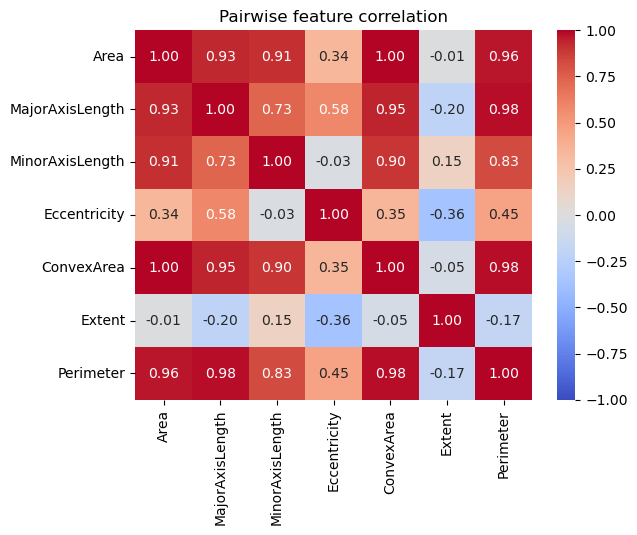

In [8]:
# Plot heatmap untuk melihat korelasi fitur
sns.heatmap(attributes.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pairwise feature correlation')
plt.show()


Hasil visualisasi menunjukkan bahwa terdapat hubungan yang kompleks antara fitur-fitur yang terkait dengan bentuk objek.

In [9]:
from sklearn.decomposition import PCA

# Lakukan PCA jika diperlukan
pca = PCA(n_components=4)
new_comp = pca.fit_transform(attributes)
df2 = pd.DataFrame(new_comp, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size=0.2, random_state=42)


melakukan reduksi dimensi pada data menggunakan metode Principal Component Analysis (PCA) dan kemudian membagi data yang sudah direduksi tersebut menjadi data latih dan data uji. Pertama, PCA digunakan untuk mengurangi dimensi dari data dengan tujuan mengurangi kompleksitasnya dan mempertahankan sebagian besar informasi yang relevan. Hasil reduksi dimensi disimpan dalam DataFrame baru (df2). Selanjutnya, data yang sudah direduksi tersebut dipisahkan menjadi dua bagian: data latih (x_train dan y_train) dan data uji (x_test dan y_test), dengan proporsi data uji sebesar 20% dari total data dan menggunakan nilai acak yang sama untuk setiap pemisahan data untuk memastikan reproduktibilitas hasil.

In [10]:
from sklearn.preprocessing import LabelEncoder

# Misalkan 'y_train' dan 'y_test' adalah array NumPy atau list yang berisi string
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

mengubah label kategori yang direpresentasikan dalam bentuk string menjadi angka, sehingga memungkinkan penggunaan algoritma pembelajaran mesin yang membutuhkan input dalam bentuk numerik.

## Membangun model ANN

In [11]:
# Inisialisasi Model
model = Sequential()

# Menambahkan Layer Input
model.add(Dense(32, input_dim=4, activation='relu'))

# Menambahkan Layer Hidden
model.add(Dense(16, activation='relu'))

# Menambahkan Layer Dropout untuk mencegah overfitting
model.add(Dropout(0.5))

# Menambahkan Layer Output
model.add(Dense(2, activation='softmax'))

# Kompilasi Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih Model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/100


23/23 [==============================] - 1s 10ms/step - loss: 3060.0928 - accuracy: 0.6000 - val_loss: 738.0606 - val_accuracy: 0.8278
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 2240.6980 - accuracy: 0.7014 - val_loss: 688.2194 - val_accuracy: 0.8278
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1432.1632 - accuracy: 0.6889 - val_loss: 582.9030 - val_accuracy: 0.8222
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 1070.7865 - accuracy: 0.7056 - val_loss: 488.5752 - val_accuracy: 0.8222
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1020.0540 - accuracy: 0.7139 - val_loss: 415.2210 - val_accuracy: 0.8222
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 553.7177 - accuracy: 0.7069 - val_loss: 327.6205 - val_accuracy: 0.8222
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 360.3931 - accuracy: 0.7319 - val_loss: 276.364

Berikut adalah jawaban untuk pertanyaan-pertanyaan tersebut berdasarkan kode yang diberikan:

- **Input Layer**: Input layer memiliki 4 neuron, sesuai dengan jumlah fitur dalam data (input_dim=4).
  
- **Hidden Layers**: Terdapat satu hidden layer dengan 16 neuron dan aktivasi ReLU.
  
- **Output Layer**: Output layer memiliki 2 neuron karena ini adalah sebuah masalah klasifikasi dua kelas (binary classification), dan aktivasi softmax digunakan untuk menghasilkan probabilitas prediksi untuk setiap kelas.
  
- **Loss Function**: Loss function yang digunakan adalah sparse categorical crossentropy. Ini cocok untuk masalah klasifikasi multikelas di mana labelnya direpresentasikan dalam bentuk integer.
  
- **Metrik Evaluasi**: Metrik evaluasi yang digunakan selama pelatihan adalah akurasi (accuracy). Ini memberikan informasi tentang seberapa baik model dapat memprediksi kelas-kelas yang benar dari data uji.
  
- **Total Parameters**: Total parameter dalam model ini dapat dihitung dengan menggabungkan jumlah parameter dari setiap layer. Untuk layer input, terdapat 4 neuron dengan bias, sehingga total parameternya adalah 4 x (jumlah neuron dalam hidden layer) + jumlah neuron dalam hidden layer + (jumlah neuron dalam hidden layer) x 2 + 2 x (jumlah neuron dalam hidden layer) + 2. Dalam hal ini, total parameter adalah 4 x 32 + 32 + 32 x 16 + 16 x 2 + 2 x 16 + 2 = 550.

In [12]:
# Predict the target variable
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Loss: 0.49
Accuracy: 83.33%


In [13]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 0s/step


melakukan prediksi kelas target (binary) berdasarkan probabilitas yang dihasilkan oleh model, di mana nilai probabilitas di atas 0.5 dianggap sebagai kelas positif (True) dan di bawah atau sama dengan 0.5 dianggap sebagai kelas negatif (False).

In [14]:
# Predict target variable
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.72      0.81        86
           1       0.79      0.94      0.85        94

    accuracy                           0.83       180
   macro avg       0.85      0.83      0.83       180
weighted avg       0.85      0.83      0.83       180



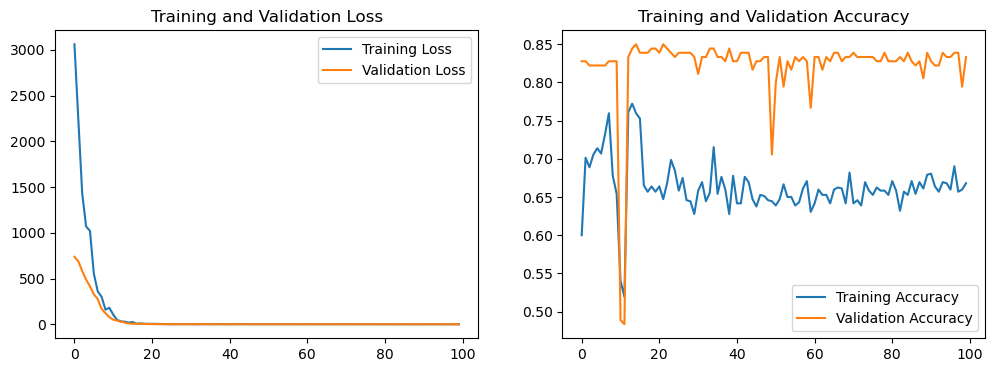

In [15]:
# Plotting History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()